<a href="https://colab.research.google.com/github/AgarwalMayank2/Face_Detection/blob/Clustering_Deb/applying_ML_algorithms/Clustering_PRMLproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task : Identify Face in image using clustering algorithm
dataset : using processed dataset

we extracted CNN(ResNet), HoG, LBP features and made these processed datasets

processed datasets : https://github.com/AgarwalMayank2/Face_Detection/tree/main/processed_dataset


# Clustering on CNN features

## Loading filtered_CNN_features_dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
url_filtered_CNN_features_dataset = 'https://raw.githubusercontent.com/AgarwalMayank2/Face_Detection/refs/heads/main/processed_dataset/filtered_CNN_features_dataset.csv' #for CNN limited
df_CNN = pd.read_csv(url_filtered_CNN_features_dataset) # reading url for extracted CNN_features_dataset_limited.csv
df_CNN = df_CNN.drop(df_CNN.columns[0], axis=1)
df_CNN.columns = range(df_CNN.shape[1])
df_CNN

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,0,0.266585,1.337187,1.352905,0.100848,1.880685,0.059888,2.773605,0.115643,0.138749,...,0.039434,0.071662,0.733759,1.643910,0.041306,1.488236,0.048181,0.247783,0.300232,Paul_Bremer
1,1,0.355948,0.750634,0.909794,0.188214,0.680066,0.221442,3.089571,0.342022,0.087186,...,0.093867,0.089694,0.859610,1.764073,0.250430,1.133540,0.004091,0.153542,0.236034,Paul_Bremer
2,2,0.267111,1.015316,1.154480,0.131544,1.066389,0.024949,3.701925,0.145037,0.082419,...,0.080086,0.089589,0.663708,1.854499,0.078751,1.240009,0.065222,0.105058,0.227633,Paul_Bremer
3,3,0.260295,0.882900,0.885955,0.106698,2.663052,0.057836,1.854394,0.209269,0.103750,...,0.181255,0.182038,0.397535,1.222931,0.007285,0.878194,0.016247,0.110492,0.129523,Paul_Bremer
4,4,0.347203,0.623839,0.817085,0.212599,1.026321,0.176634,2.486715,0.426571,0.345026,...,0.267895,0.136346,0.713298,0.978184,0.059828,1.008205,0.042905,0.028597,0.199120,Paul_Bremer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,4319,0.110671,0.933532,1.576373,0.047225,0.697608,0.100375,2.509764,0.342827,0.115562,...,0.161235,0.646160,0.615094,1.555704,0.093572,0.744401,0.186377,0.036658,0.164960,Charles_Moose
4320,4320,0.250879,1.126343,0.961169,0.032000,0.247225,0.064331,2.297021,0.689515,0.502984,...,0.322805,0.402172,0.624546,1.822085,0.377166,0.638106,0.105163,0.089668,0.067495,Charles_Moose
4321,4321,0.101699,1.497757,0.805623,0.210569,1.158021,0.287555,1.315162,0.545735,0.269730,...,0.252010,0.129211,1.347581,1.599726,0.049081,2.030167,0.162992,0.033966,0.037959,Charles_Moose
4322,4322,0.108061,0.696727,1.336171,0.016554,0.625865,0.380914,2.106623,0.466441,0.081740,...,0.168940,0.217983,0.425700,1.362742,0.245273,0.682824,0.271875,0.023275,0.111986,Charles_Moose


Splitting dataframe into train and test in 4:1 ratio

In [ ]:
# Separate features and labels
X = df_CNN.iloc[:, :-1]
y = df_CNN.iloc[:, -1]

# Encode labels (alphabetically)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# encoding is benificial as working on numbers is lot easier than working on string

# Ensure stratified split (16 training, 4 testing per class)
X_train_CNN, X_test_CNN, y_train_CNN, y_test_CNN = train_test_split(X, y_encoded, test_size=1/5, random_state=42, stratify=y_encoded)

# Normalize features
scaler = StandardScaler()
X_train_CNN = scaler.fit_transform(X_train_CNN)
X_test_CNN = scaler.transform(X_test_CNN)

print(f"Dataset size: {df_CNN.shape}")
print(f"Training size: {X_train_CNN.shape}, Testing size: {X_test_CNN.shape}")

Dataset size: (4324, 2050)
Training size: (3459, 2049), Testing size: (865, 2049)


## Function of algorithm

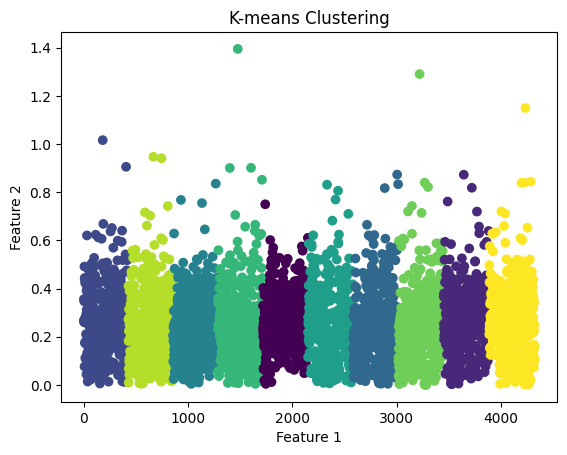

   Unnamed: 0         0         1         2         3         4         5  \
0           0  0.266585  1.337187  1.352905  0.100848  1.880685  0.059888   
1           1  0.355948  0.750634  0.909794  0.188214  0.680066  0.221442   
2           2  0.267111  1.015316  1.154480  0.131544  1.066389  0.024949   
3           3  0.260295  0.882900  0.885955  0.106698  2.663052  0.057836   
4           4  0.347203  0.623839  0.817085  0.212599  1.026321  0.176634   

          6         7         8  ...      2040      2041      2042      2043  \
0  2.773605  0.115643  0.138749  ...  0.071662  0.733759  1.643910  0.041306   
1  3.089571  0.342022  0.087186  ...  0.089694  0.859610  1.764073  0.250430   
2  3.701925  0.145037  0.082419  ...  0.089589  0.663708  1.854499  0.078751   
3  1.854394  0.209269  0.103750  ...  0.182038  0.397535  1.222931  0.007285   
4  2.486715  0.426571  0.345026  ...  0.136346  0.713298  0.978184  0.059828   

       2044      2045      2046      2047         2048  

In [ ]:
#algorithm
# Apply K-means clustering on the entire dataset (not just train/test split)
kmeans = KMeans(n_clusters=10, random_state=42)  # Using 3 clusters for demonstration
kmeans.fit(X)

# Add cluster labels to the dataset
df_CNN['Cluster'] = kmeans.labels_

# Visualize the clusters using the first two features (if applicable)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Output the cluster labels and updated dataset
print(df_CNN.head())